In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


- It contains value- and equal-weighted returns for 48 industry portfolios.
- The portfolios are constructed at the end of June.
- The annual returns are from January to December.
- Missing data are indicated by -99.99 or -999.

### Data Import

In [2]:
df_raw = pd.read_csv('48_Industry_Portfolios_Daily.csv', skiprows=range(0,9))
df_raw.drop(axis=0, labels=range(25292,len(df_raw)), inplace=True)
df_raw

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,19260701,0.56,-0.07,-99.99,-1.39,0.0,-1.44,0.62,-1.27,-0.9,...,-0.93,0.14,2.77,-0.02,0.27,0.59,0.47,0.81,0.57,-1.66
1,19260702,0.29,0.06,-99.99,0.78,0.7,1.46,0.03,0.0,-0.34,...,1.07,0.07,0.0,0.01,-0.1,1.04,-0.03,-0.61,-1.03,3.09
2,19260706,-0.33,0.18,-99.99,-1.74,0.5,-0.96,-0.06,4.27,-1.2,...,0.73,-0.2,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.62,1.41
3,19260707,3.57,-0.15,-99.99,-1.73,-0.12,-0.49,-0.06,-4.1,-0.22,...,2.22,0.18,-3.21,-0.57,-1.08,-1.09,0.21,0.07,0.17,0.62
4,19260708,0.3,1.12,-99.99,-0.15,0.3,-0.49,0.24,0.0,-0.01,...,-0.39,0.46,-1.1,-0.38,0.33,0.99,-0.88,-0.36,-1.1,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25287,20220725,2.69,0.98,0.99,0.09,0.53,-1.31,-0.39,0.34,0.28,...,0.28,0.60,0.59,-0.69,-1.08,0.79,1.30,0.52,0.31,0.58
25288,20220726,-0.28,0.69,1.36,0.92,0.71,-3.67,-2.31,-0.51,-0.49,...,-0.53,-1.76,-0.58,-4.50,-0.09,-1.55,0.03,-1.88,-1.79,-0.26
25289,20220727,1.88,-0.07,0.04,0.28,0.19,3.99,4.16,3.22,1.27,...,2.23,1.78,1.49,3.24,3.54,1.36,0.51,2.41,1.88,1.51
25290,20220728,0.50,1.63,1.68,1.69,0.10,1.51,0.25,0.65,1.78,...,1.27,1.81,1.58,1.39,1.66,0.12,0.39,1.27,3.13,2.20


### Data Cleaning

In [3]:
df = df_raw.copy()
df = df.apply(pd.to_numeric)
df.rename(columns={'Unnamed: 0':'Date'}, inplace=True)

tmp = df.columns
tmp = list(tmp)

out = []
for i in tmp:
    out.append(i.replace(' ', ''))

df.columns = out
#df.info()

In [4]:
#making the date column into actual date 
df['Date'] = df['Date'].astype(str)
df['Date'] = df['Date'].apply(lambda x: (x[:4] + '-' + x[4:6] + '-' + x[6:]))
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
0,1926-07-01,0.56,-0.07,-99.99,-1.39,0.00,-1.44,0.62,-1.27,-0.90,...,-0.93,0.14,2.77,-0.02,0.27,0.59,0.47,0.81,0.57,-1.66
1,1926-07-02,0.29,0.06,-99.99,0.78,0.70,1.46,0.03,0.00,-0.34,...,1.07,0.07,0.00,0.01,-0.10,1.04,-0.03,-0.61,-1.03,3.09
2,1926-07-06,-0.33,0.18,-99.99,-1.74,0.50,-0.96,-0.06,4.27,-1.20,...,0.73,-0.20,0.77,-0.22,-0.67,0.45,0.31,-0.72,0.62,1.41
3,1926-07-07,3.57,-0.15,-99.99,-1.73,-0.12,-0.49,-0.06,-4.10,-0.22,...,2.22,0.18,-3.21,-0.57,-1.08,-1.09,0.21,0.07,0.17,0.62
4,1926-07-08,0.30,1.12,-99.99,-0.15,0.30,-0.49,0.24,0.00,-0.01,...,-0.39,0.46,-1.10,-0.38,0.33,0.99,-0.88,-0.36,-1.10,0.98


## Split data 

In [5]:
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import *

In [6]:
# selecting only the most recent 63 days 
date = '2022-01-03'
no_obj = 63
date_i = df[df['Date'] == date].index[0]

q1 = df.copy()
q1 = q1.iloc[date_i-63:date_i,:]
q1.head()

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
25085,2021-10-04,-2.01,0.10,-0.39,-0.35,0.57,-3.49,-1.91,-1.11,-0.66,...,0.20,-0.48,-0.43,-1.83,-0.97,-0.80,-1.01,-2.60,-1.80,-0.78
25086,2021-10-05,1.91,0.75,0.51,0.36,-0.13,1.07,2.83,0.94,0.48,...,1.39,1.24,0.48,0.66,0.36,1.07,1.56,0.99,2.41,1.10
25087,2021-10-06,-2.85,1.00,1.03,1.84,0.38,1.78,0.11,-0.08,0.88,...,0.23,1.05,-0.71,0.57,0.50,0.31,0.34,-1.41,0.13,0.54
25088,2021-10-07,1.04,-0.07,0.36,1.08,-0.63,2.05,-0.17,1.80,0.69,...,0.51,0.00,1.73,1.40,0.76,0.71,1.56,1.35,1.01,1.17
25089,2021-10-08,0.48,-0.48,0.09,-0.01,0.00,-1.04,-0.31,0.08,-0.55,...,-1.12,0.48,-0.01,-0.36,-0.60,0.37,0.63,-1.13,0.67,0.08


INDUSTRIES
- Trans, Hshld, Guns, LabEq, Fin, Hlth

In [7]:
# select the 6 industries that we want 
'''
q1 = q1[['Trans', 'Hshld', 'Guns', 'LabEq', 'Fin', 'Hlth']]
q1.head()
'''

"\nq1 = q1[['Trans', 'Hshld', 'Guns', 'LabEq', 'Fin', 'Hlth']]\nq1.head()\n"

In [8]:
# FOR TESTING
q1 = q1[['Agric', 'Food', 'Soda', 'Beer', 'Smoke', 'Toys']]
q1.head()

,Agric,Food,Soda,Beer,Smoke,Toys
25085,-2.01,0.10,-0.39,-0.35,0.57,-3.49
25086,1.91,0.75,0.51,0.36,-0.13,1.07
25087,-2.85,1.00,1.03,1.84,0.38,1.78
25088,1.04,-0.07,0.36,1.08,-0.63,2.05
25089,0.48,-0.48,0.09,-0.01,0.00,-1.04


In [29]:
# split the data
R_train, R_test = train_test_split(q1, random_state=0)


In [30]:
# calculate demeaned R 
sc = StandardScaler(with_std = False)
R_train[R_train.columns] = sc.fit_transform(R_train[R_train.columns])
R_test[R_test.columns] = sc.fit_transform(R_test[R_test.columns])


<ipython-input-30-5e9eb1e62f1d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R_train[R_train.columns] = sc.fit_transform(R_train[R_train.columns])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [31]:
# calculate the y

#Specify array_len!
arr_len = 6

eq_w = np.full(
    shape = arr_len,
    fill_value = 1/arr_len
)


y_train = np.dot(R_train, eq_w)
y_test = np.dot(R_test, eq_w)


'''
print('Equal weight portfolio: {}'.format(eq_w))
print('\n')
print('y_train: {}'.format(y_train))
print('\n')
print('y_test: {}'.format(y_test))
'''

"\nprint('Equal weight portfolio: {}'.format(eq_w))\nprint('\n')\nprint('y_train: {}'.format(y_train))\nprint('\n')\nprint('y_test: {}'.format(y_test))\n"

In [32]:
# calculate X

#N matrix 
tmp1 = np.identity((arr_len-1), dtype='int64')
tmp2 = -np.ones((arr_len-1), dtype='int64')
N = np.append(tmp1,[tmp2], axis=0)

X_train = np.dot(R_train, N)
X_test = np.dot(R_test, N)

'''
print('N matrix: {}'.format(N))
print('\n')
print('X_train: {}'.format(X_train))
print('\n')
print('X_test: {}'.format(X_test))
'''


"\nprint('N matrix: {}'.format(N))\nprint('\n')\nprint('X_train: {}'.format(X_train))\nprint('\n')\nprint('X_test: {}'.format(X_test))\n"

# Linear regression

In [33]:
reg = LinearRegression(fit_intercept = False)
reg.fit(X_train, y_train)

train_r2 = reg.score(X_train, y_train)
train_mse = mean_squared_error(y_train, reg.predict(X_train))

test_r2 = reg.score(X_test, y_test)
test_mse = mean_squared_error(y_test, reg.predict(X_test))

beta = reg.coef_
w = eq_w - np.dot(N,beta)

print('training r^2:{}'.format(train_r2))
print('training mse:{}'.format(train_mse))

print('test r^2:{}'.format(test_r2))
print('test mse:{}'.format(test_mse))

print('beta:{}'.format(beta))
print('w:{}'.format(w))


training r^2:0.3342452965309619
training mse:0.46230814314913216
test r^2:-0.8049972585722349
test mse:0.5226996101500395
beta:[ 0.29611841  0.19880322  0.05796472 -0.40446051 -0.16888886]
w:[-0.12945174 -0.03213655  0.10870195  0.57112718  0.33555552  0.14620364]


actual weights of first 6 

-0.002, -0.004, 0.049, 0.514, 0.316, 0.128

# How the value of lambda affects r^2 

## Ridge

In [93]:
alpha_vec = np.logspace(-8,3,100)

#print(alpha_vec)

# results list 
train_r2 = []
train_mse = []
coeff_dict = {}

test_r2 = []
test_mse = []

for cur_alpha in alpha_vec:
    ridge = Ridge(cur_alpha)
    ridge.fit(X_train, y_train)
    
    # Training
    train_r2.append(ridge.score(X_train, y_train))
    train_mse.append(mean_squared_error(y_train, ridge.predict(X_train)))
    coeff_dict[cur_alpha] = ridge.coef_
    
    # Test 
    test_r2.append(ridge.score(X_test, y_test))
    test_mse.append(mean_squared_error(y_test, ridge.predict(X_test)))
    
#print(train_r2)
    

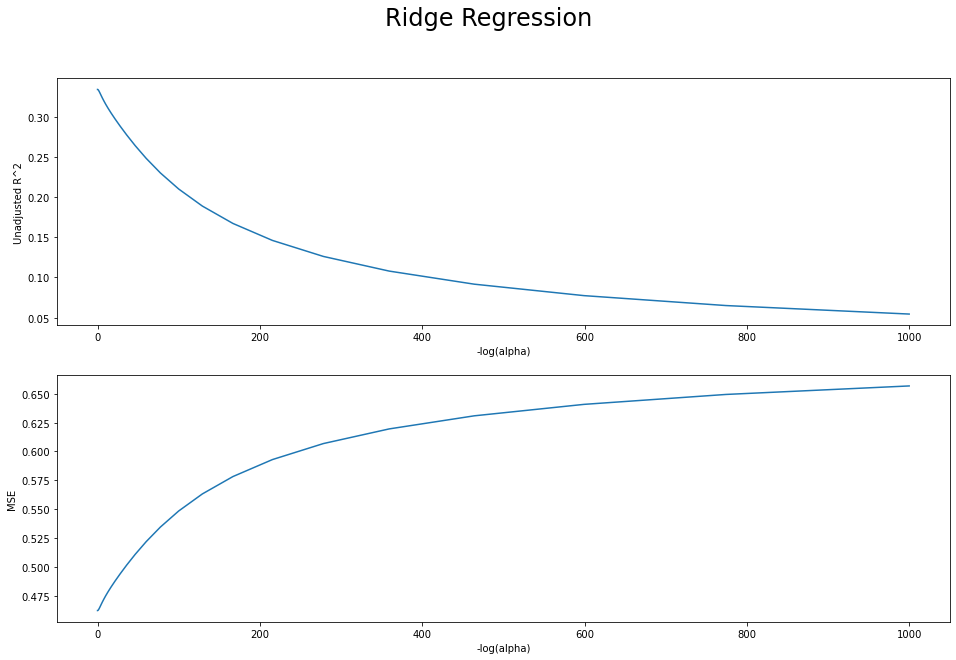

In [94]:
fig, axs = plt.subplots(nrows=2, figsize=(16,10))
sns.lineplot(x=alpha_vec, y=np.array(train_r2), ax=axs[0])
axs[0].set(xlabel='-log(alpha)', ylabel='Unadjusted R^2')

sns.lineplot(x=alpha_vec, y=np.array(train_mse), ax=axs[1])
axs[1].set(xlabel='-log(alpha)', ylabel='MSE')

fig.suptitle('Ridge Regression', fontsize = 24)

plt.show()

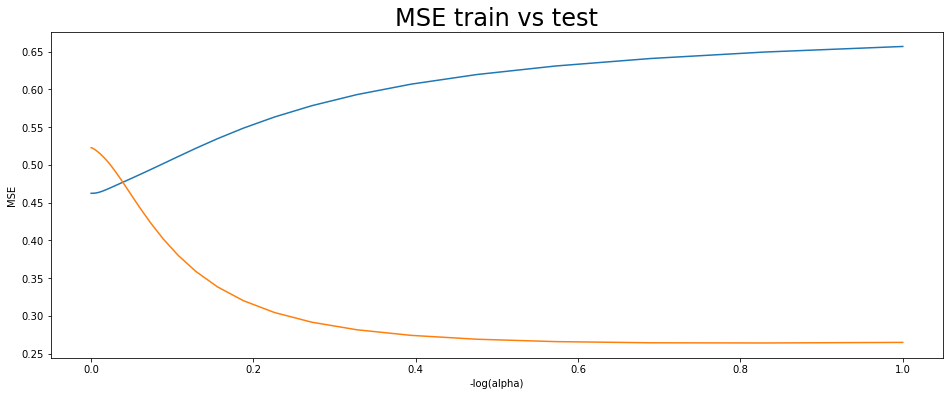

In [114]:
plt.figure(figsize=(16,6))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(train_mse))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(test_mse))
fig1.set(xlabel='-log(alpha)', ylabel='MSE')
plt.title('MSE train vs test', fontsize = 24)

plt.show()

## LASSO 

In [140]:
alpha_vec = np.logspace(-8,-1,100)

# results list 
train_r2 = []
train_mse = []
coeff_dict = {}

test_r2 = []
test_mse = []


# iterate over all alphas in range
for cur_alpha in alpha_vec:
    lasso = Lasso(cur_alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    
    # Training
    train_r2.append(lasso.score(X_train, y_train))
    train_mse.append(mean_squared_error(y_train, lasso.predict(X_train)))
    coeff_dict[cur_alpha] = ridge.coef_
    
    # Test 
    test_r2.append(lasso.score(X_test, y_test))
    test_mse.append(mean_squared_error(y_test, lasso.predict(X_test)))
    
    


[0.3342452965309586, 0.33424529653095725, 0.33424529653095547, 0.33424529653095314, 0.3342452965309496, 0.33424529653094504, 0.3342452965309388, 0.33424529653092994, 0.3342452965309177, 0.33424529653090074, 0.33424529653087753, 0.3342452965308452, 0.33424529653080026, 0.33424529653073853, 0.3342452965306535, 0.3342452965305348, 0.3342452965303714, 0.3342452965301457, 0.33424529652983326, 0.3342452965296111, 0.3342452965290431, 0.33424529652824664, 0.33424529652712953, 0.3342452965255709, 0.33424529652339585, 0.33424529652036405, 0.3342452965161371, 0.334245296510263, 0.33424529650208445, 0.3342452964907351, 0.33424529647495116, 0.3342452964530688, 0.3342452964226622, 0.33424529638046974, 0.33424529632194044, 0.33424529624077104, 0.3342452961282283, 0.33424529597221697, 0.33424529575598394, 0.33424529545577275, 0.33424529504037026, 0.3342452944637533, 0.3342452936661202, 0.3342452925591717, 0.3342452910252306, 0.3342452889039744, 0.3342452859609163, 0.3342452818837002, 0.334245276224613

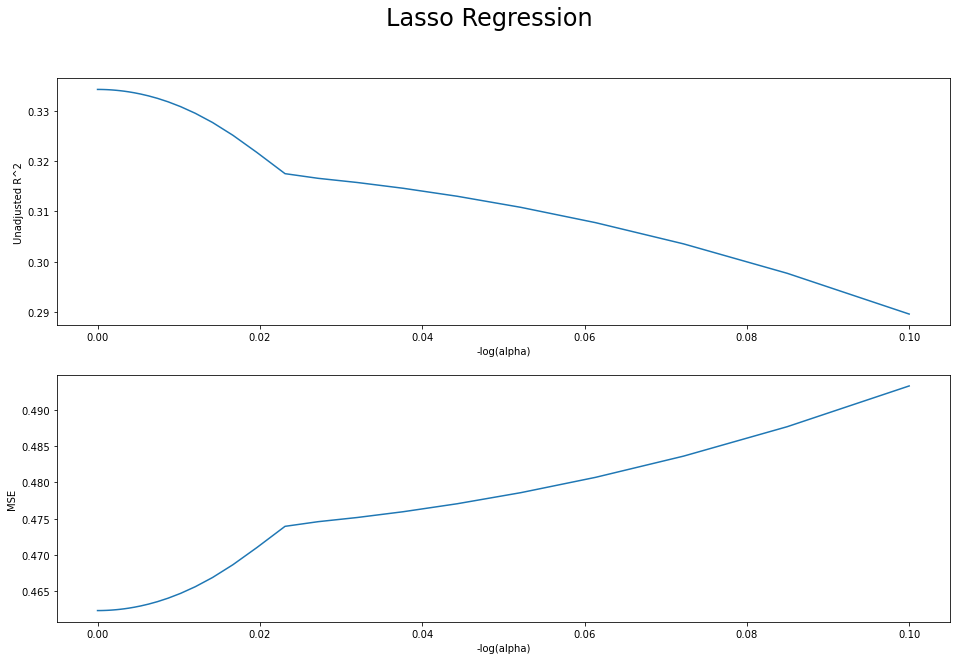

In [117]:
fig, axs = plt.subplots(nrows=2, figsize=(16,10))
sns.lineplot(x=alpha_vec, y=np.array(train_r2), ax=axs[0])
axs[0].set(xlabel='-log(alpha)', ylabel='Unadjusted R^2')

sns.lineplot(x=alpha_vec, y=np.array(train_mse), ax=axs[1])
axs[1].set(xlabel='-log(alpha)', ylabel='MSE')

fig.suptitle('Lasso Regression', fontsize = 24)

plt.show()

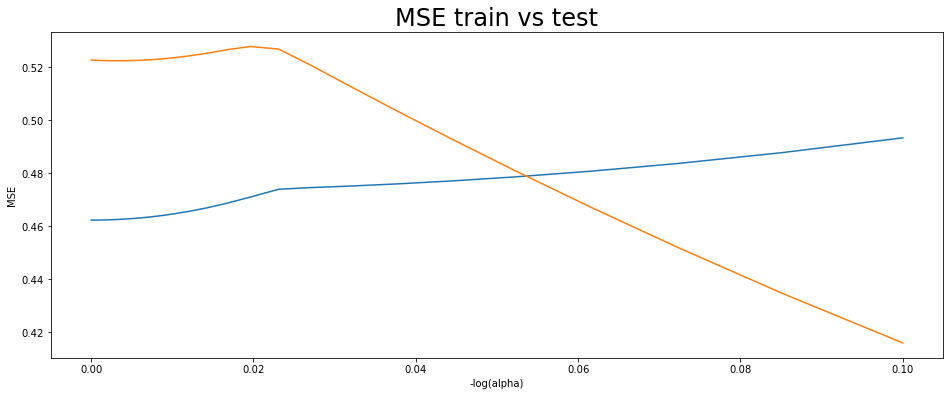

In [118]:
plt.figure(figsize=(16,6))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(train_mse))
fig1 = sns.lineplot(x=alpha_vec, y=np.array(test_mse))
fig1.set(xlabel='-log(alpha)', ylabel='MSE')
plt.title('MSE train vs test', fontsize = 24)

plt.show()


# Cross Validation (ridge)

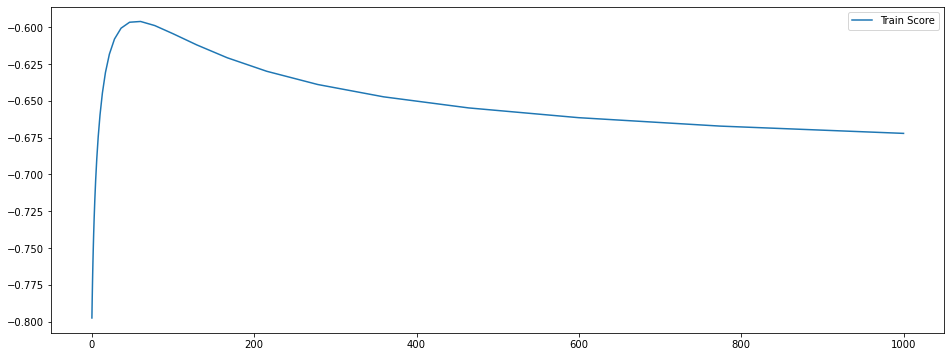

In [73]:
alpha_vec = np.logspace(-8,3,100)

cvResults = []

# iterate over all alphas in range
for cur_alpha in alpha_vec:
    clf_cv = Ridge(cur_alpha)
    
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator = clf_cv, X = X_train, y = y_train, cv = 10, \
                             scoring = 'neg_mean_squared_error', n_jobs = 4)
    
    cvResults.append(scores.mean())

# plot results

plt.figure(figsize=(16,6))
sns.lineplot(y = cvResults, x = alpha_vec, label = "Train Score")
plt.show()



In [96]:
ridgecv = RidgeCV(alphas = alpha_vec, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
ridge_best_alpha = ridgecv.alpha_
print('ridge alpha: {}'.format(ridgecv.alpha_))


# refit on full dataset with optimized parameter
opt_ridge = Ridge(alpha = ridgecv.alpha_)
opt_ridge.fit(X_train, y_train)

# assess on test set
print('Test set MSE: {}'.format(mean_squared_error(y_test, opt_ridge.predict(X_test))))
print('Test set Rsq: {}'.format(r2_score(y_test, opt_ridge.predict(X_test))))

ridge alpha: 35.93813663804626
Test set MSE: 0.40159053540202616
Test set Rsq: -0.3867808611166581


In [113]:
# using the value of alpha to get the right model 
ridge = Ridge(ridge_best_alpha)
ridge.fit(X_train, y_train)

# Training
print(f'train r^2: {ridge.score(X_train, y_train)}')
print(f'train mse: {mean_squared_error(y_train, ridge.predict(X_train))}')
print(f'beta: {ridge.coef_}')
print(f'w: {eq_w - np.dot(N,ridge.coef_)}')


print('\n')
    
# Test 
print(f'test r^2: {ridge.score(X_test, y_test)}')
print(f'test mse: {mean_squared_error(y_test, ridge.predict(X_test))}')


train r^2: 0.2775206623326243
train mse: 0.5016984173302996
beta: [ 0.19629148 -0.01982617 -0.01117438 -0.09917607 -0.10396529]
w: [-0.02962481  0.18649284  0.17784105  0.26584274  0.27063196  0.12881623]


test r^2: -0.3867808611166581
test mse: 0.40159053540202616


# Cross Validation (Lasso)

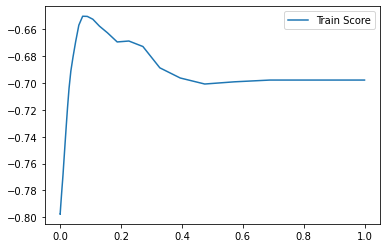

In [107]:
# range of alphas to try (need to do a bit of trial and error)
alpha_vec = np.logspace(-8,0,100)

# results list 
cvResults = []

for cur_alpha in alpha_vec:
    clf_cv = Lasso(cur_alpha)
    
    # Perform 10-fold cross validation 
    scores = cross_val_score(estimator = clf_cv, X = X_train, y = y_train, cv = 10, \
                             scoring = 'neg_mean_squared_error', n_jobs = 4)
    
    # Attach results
    cvResults.append(scores.mean())

# plot results
plt.figure()
sns.lineplot(y = cvResults, x = alpha_vec, label = "Train Score")
plt.show()

In [108]:
lassocv = LassoCV(alphas = alpha_vec, max_iter=10000)
lassocv.fit(X_train, y_train)
lasso_best_alpha = lassocv.alpha_
print(f'alpha: {lassocv.alpha_}')

# refit on full dataset with optimized parameter
opt_lasso = Lasso(alpha = lassocv.alpha_)
opt_lasso.fit(X_train, y_train)

# assess on test set
print(f'Test set MSE: {mean_squared_error(y_test, opt_lasso.predict(X_test))}')
print(f'Test set Rsq: {r2_score(y_test, opt_lasso.predict(X_test))}')

alpha: 0.10722672220103253
Test set MSE: 0.407339910386298
Test set Rsq: -0.4066347234184411


In [112]:
# using the value of alpha to get the right model 
lasso = Lasso(-np.log(lasso_best_alpha))
lasso.fit(X_train, y_train)
print(-np.log(lasso_best_alpha))

# Training
print(f'train r^2: {lasso.score(X_train, y_train)}')
print(f'train mse: {mean_squared_error(y_train, lasso.predict(X_train))}')
print(f'beta: {lasso.coef_}')
print(f'w: {eq_w - np.dot(N,lasso.coef_)}')


print('\n')
    
# Test 
print(f'test r^2: {lasso.score(X_test, y_test)}')
print(f'test mse: {mean_squared_error(y_test, lasso.predict(X_test))}')



2.2328097871457393
train r^2: 0.0
train mse: 0.6944121321865097
beta: [ 0. -0. -0. -0. -0.]
w: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


test r^2: 0.0
test mse: 0.28958471137152775


# trying shit out

In [142]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


clf = Lasso()

scores = cross_val_score(clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
rmse_r2 = np.sqrt(-scores)
print(rmse_r2.mean())

0.7258008575934072


# Q2

In [124]:
q2 = df.copy()
q2 = q2.iloc[date_i-63:date_i,:]
q2 = q2.iloc[:,0:25]
q2

,Date,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,...,Rubbr,Txtls,BldMt,Cnstr,Steel,FabPr,Mach,ElcEq,Autos,Aero
25085,2021-10-04,-2.01,0.10,-0.39,-0.35,0.57,-3.49,-1.91,-1.11,-0.66,...,-0.98,-0.47,-0.25,-0.71,-0.31,0.46,-1.08,-1.58,0.78,-0.52
25086,2021-10-05,1.91,0.75,0.51,0.36,-0.13,1.07,2.83,0.94,0.48,...,0.94,0.42,0.66,-0.10,1.73,-2.66,1.12,0.80,0.06,0.62
25087,2021-10-06,-2.85,1.00,1.03,1.84,0.38,1.78,0.11,-0.08,0.88,...,0.00,-0.06,0.28,0.34,-2.99,-1.51,-0.48,0.21,-0.12,0.47
25088,2021-10-07,1.04,-0.07,0.36,1.08,-0.63,2.05,-0.17,1.80,0.69,...,1.11,1.47,1.00,1.35,2.58,2.60,1.36,2.28,1.94,0.86
25089,2021-10-08,0.48,-0.48,0.09,-0.01,0.00,-1.04,-0.31,0.08,-0.55,...,-1.55,-1.17,-0.33,-0.69,-1.04,-2.07,-0.73,-1.15,-0.28,-0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25143,2021-12-27,1.23,0.71,0.77,0.84,0.48,-0.43,-0.29,1.04,1.16,...,1.81,1.83,2.00,1.27,1.90,1.48,1.86,1.42,2.26,0.26
25144,2021-12-28,0.85,0.94,0.25,0.51,0.68,-0.72,-0.71,0.16,0.45,...,0.13,0.61,0.16,0.41,-0.82,-0.49,-0.22,-0.52,-0.39,0.88
25145,2021-12-29,-0.28,0.25,0.28,0.37,0.31,-0.73,-0.17,-0.15,0.70,...,0.56,0.16,0.58,0.98,0.15,0.18,0.36,-0.15,-0.22,-0.40
25146,2021-12-30,-0.41,-0.04,-0.28,-0.09,-0.14,2.91,0.71,0.07,-0.64,...,-0.05,0.19,-1.00,-0.83,-0.45,0.72,-0.74,0.05,-1.03,-0.19


In [ ]:
R_train, R_test = train_test_split(q1, random_state=0)